In [14]:
from google.colab import files
uploaded = files.upload()



Saving Titanic-Dataset.csv to Titanic-Dataset (3).csv


In [15]:
import pandas as pd
import io
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()
df.describe(include='all')
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

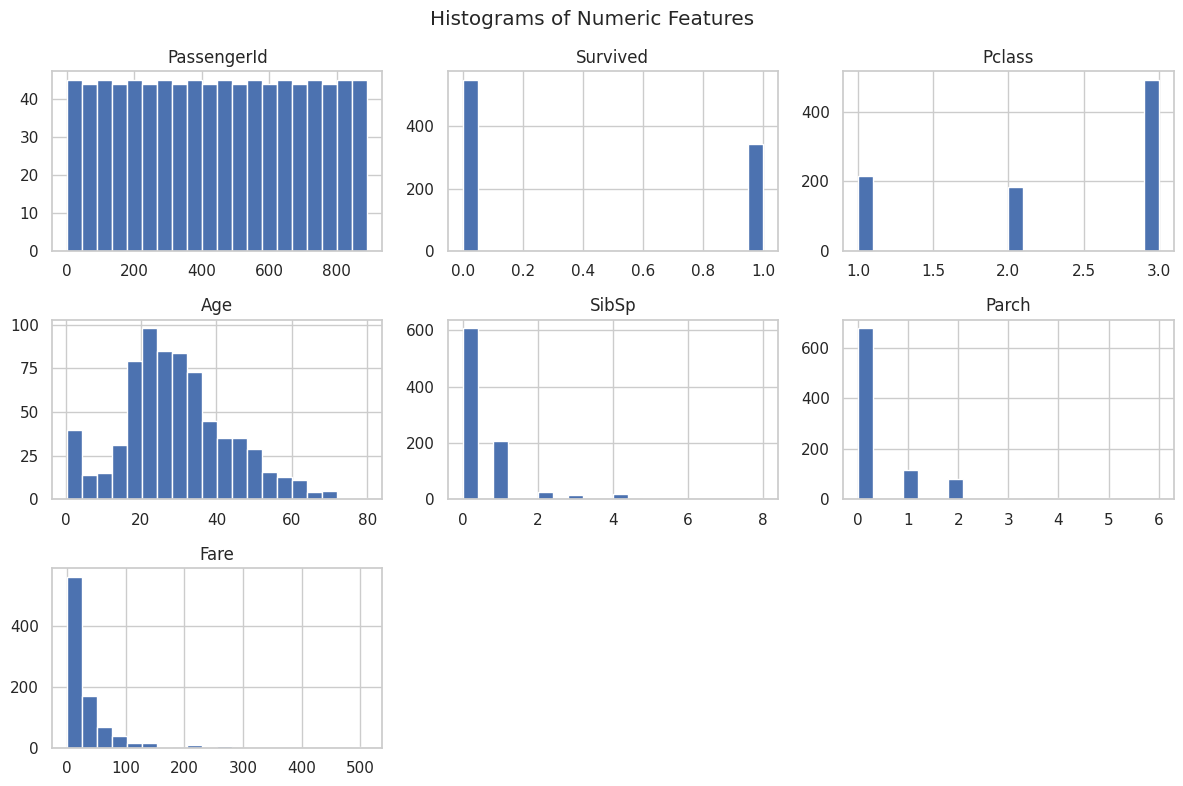

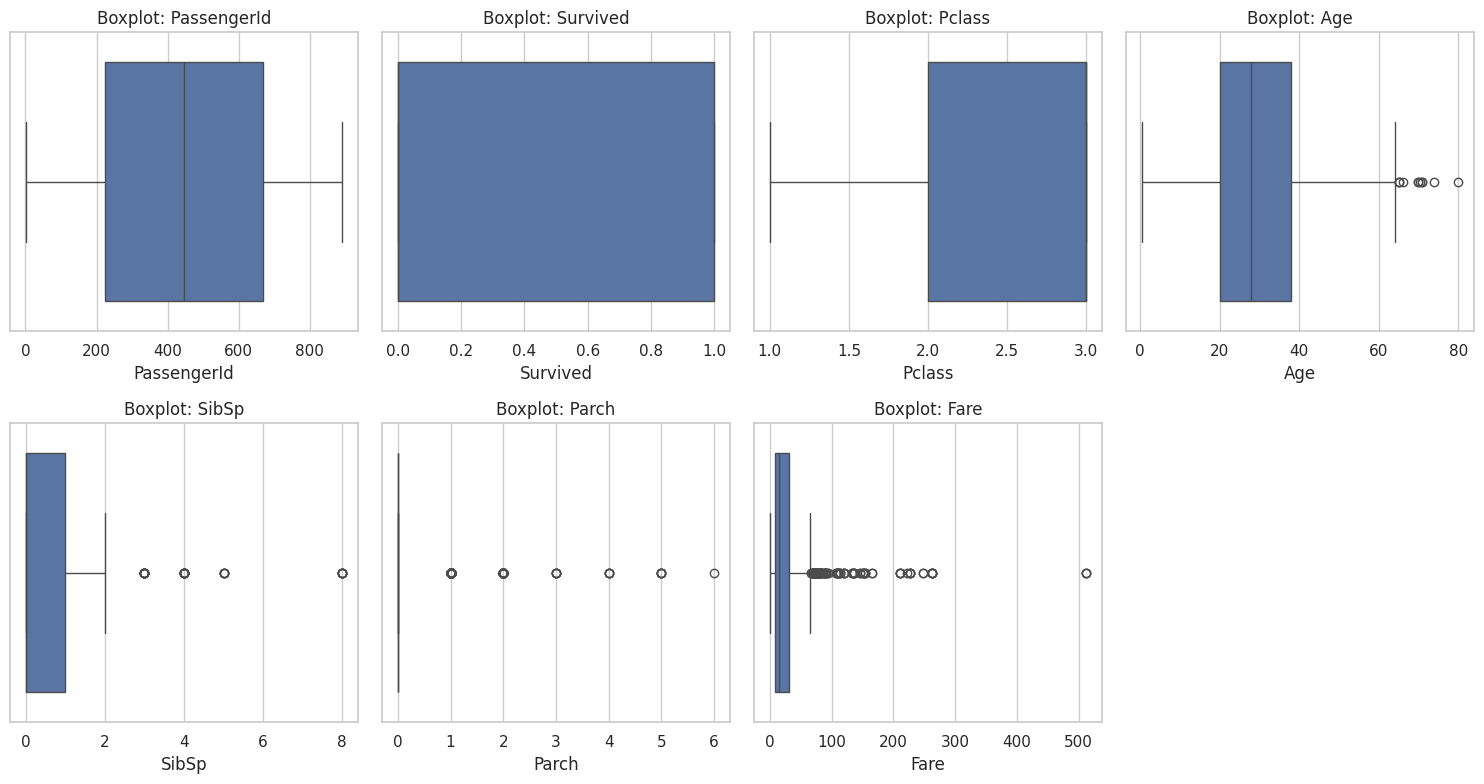

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


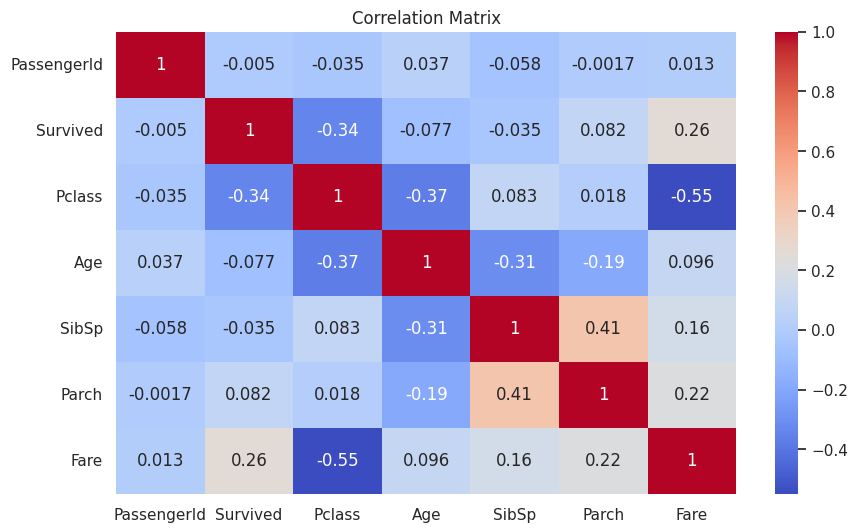

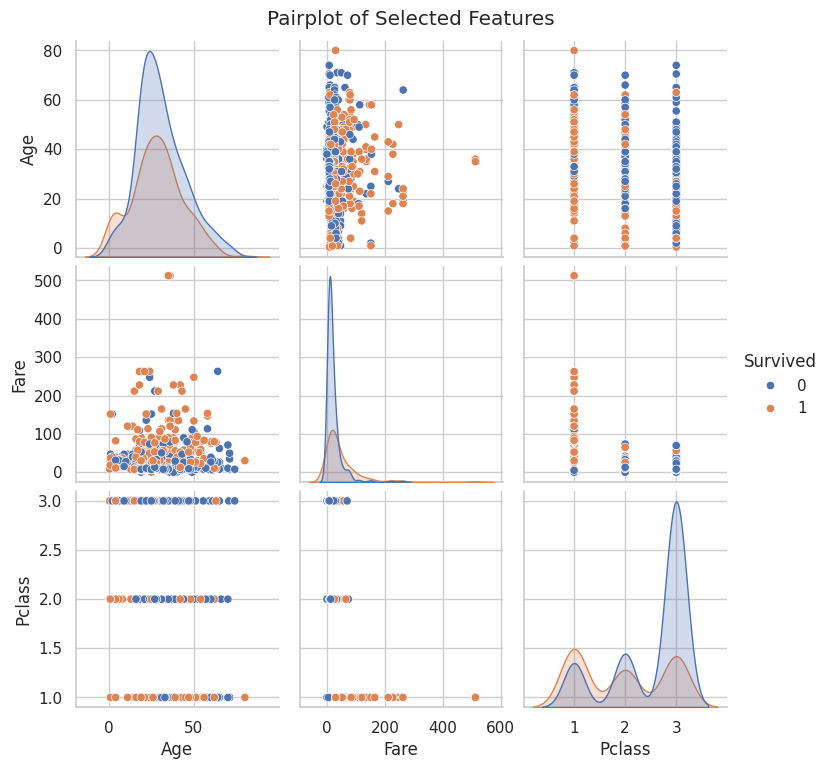

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
selected_cols = ['Age', 'Fare', 'Survived', 'Pclass']
available = [col for col in selected_cols if col in df.columns]
sns.pairplot(df[available], hue='Survived' if 'Survived' in df.columns else None)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


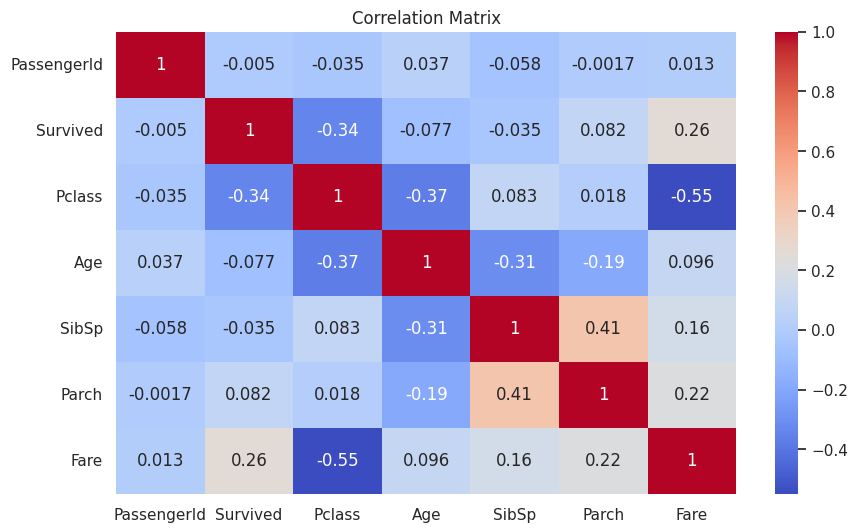

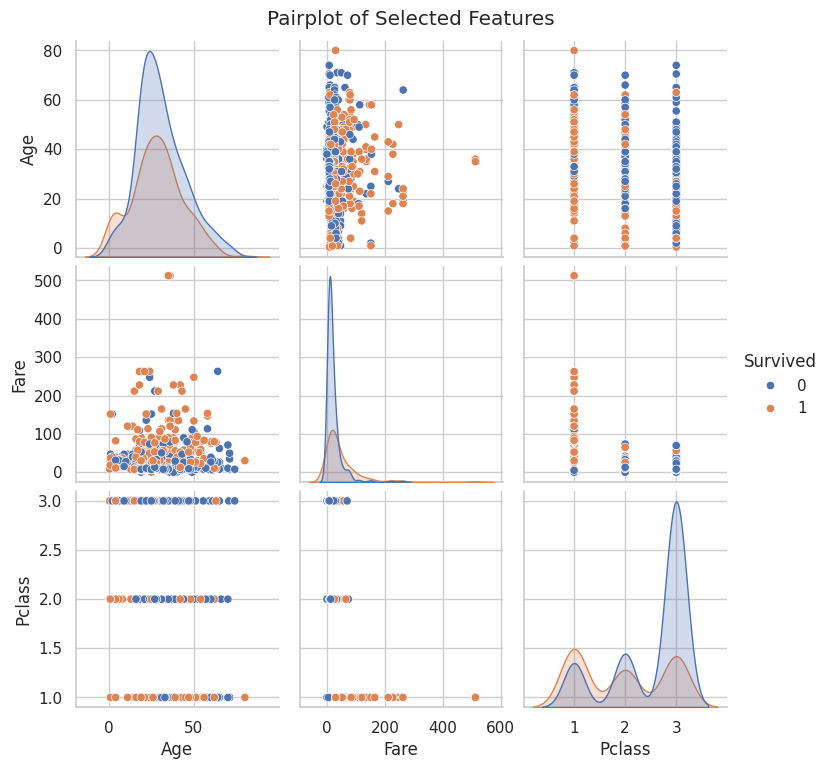

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
cols_for_pairplot = ['Survived', 'Age', 'Fare', 'Pclass']
available_cols = [col for col in cols_for_pairplot if col in df.columns]
if len(available_cols) >= 2:
    sns.pairplot(df[available_cols], hue='Survived' if 'Survived' in df.columns else None)
    plt.suptitle("Pairplot of Selected Features", y=1.02)
    plt.show()


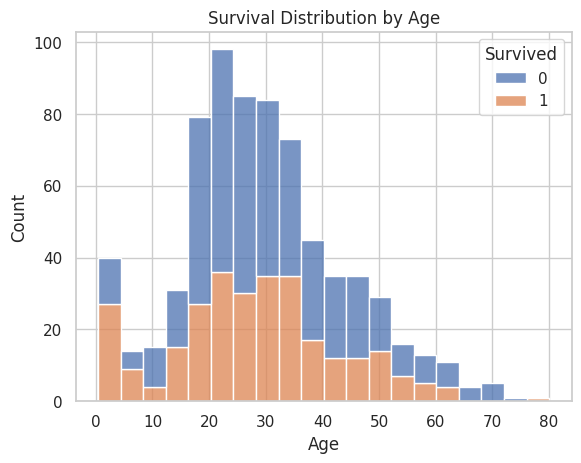

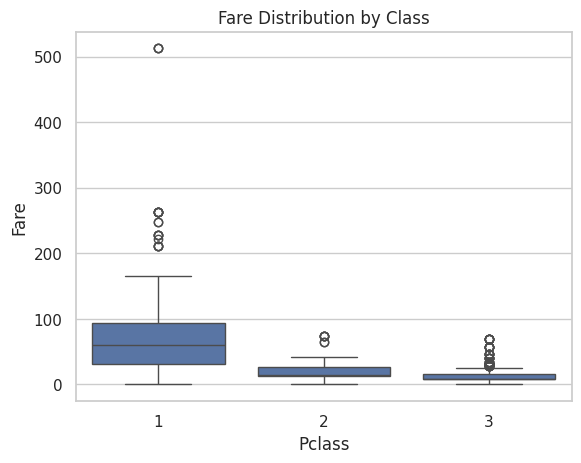

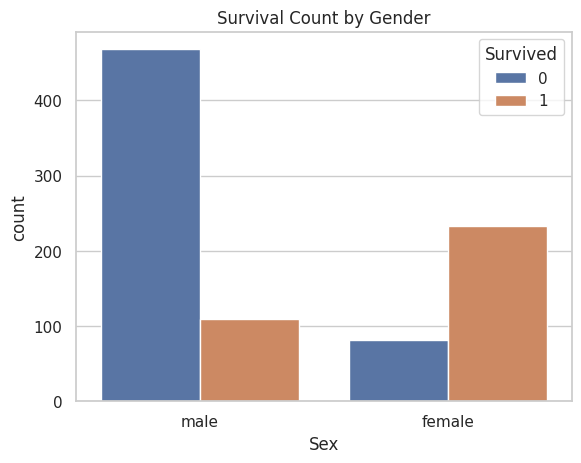

In [20]:
if 'Survived' in df.columns and 'Age' in df.columns:
    sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
    plt.title("Survival Distribution by Age")
    plt.show()

if 'Pclass' in df.columns and 'Fare' in df.columns:
    sns.boxplot(x='Pclass', y='Fare', data=df)
    plt.title("Fare Distribution by Class")
    plt.show()

if 'Sex' in df.columns and 'Survived' in df.columns:
    sns.countplot(x='Sex', hue='Survived', data=df)
    plt.title("Survival Count by Gender")
    plt.show()
